In [2]:
pip install ucimlrepo

In [21]:
# Import the warnings library
import warnings

# Suppress all warnings in the notebook to prevent unnecessary clutter from warnings
# Use this with caution, as ignoring warnings can sometimes mask important messages
warnings.filterwarnings('ignore')

In [22]:
# Import necessary libraries for data fetching and manipulation
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch the Dow Jones Index dataset from the UCI Machine Learning Repository using its unique ID
dow_jones_index = fetch_ucirepo(id=312)

# Store the dataset's features in a DataFrame 'X' for further analysis and processing
X = dow_jones_index.data.features

# Store the target variable of the dataset in a DataFrame 'y', which could be used for supervised learning tasks
y = dow_jones_index.data.targets


In [23]:
# Display basic information about the dataset
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (750, 15)
Shape of target (y): (750, 1)


In [24]:
# Display the first few rows of the dataset
X.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029


**Removing Null from Data**

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [26]:
y

,percent_change_next_weeks_price
0,-4.428490
1,-2.470660
2,1.638310
3,5.933250
4,0.230814
...,...
745,-2.521610
746,-1.420980
747,-1.225000
748,-2.377620


In [27]:
feature_names = X.columns
print("Feature names:", feature_names)

Feature names: Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'days_to_next_dividend', 'percent_return_next_dividend'],
      dtype='object')


**Preprocessing**

**Convert object colom to Numerical**

In [28]:
# Define the list of column names that contain object type data with currency symbols
columns_to_convert = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']

# Loop through each column in the list to perform the conversion
for column in columns_to_convert:
    # Remove dollar signs and commas from the string representation of the numbers
    # Convert the cleaned strings to numeric values, treating any errors by coercing to NaN
    X[column] = pd.to_numeric(X[column].str.replace('$', '').replace(',', ''), errors='coerce')


**Handling with missing Values**

In [29]:
# Address missing values within the dataset for consistency and to prepare for analysis

# Fill missing values in 'percent_change_volume_over_last_wk' with the column's mean
# Replacing NaNs with the mean maintains the overall distribution for this feature
X['percent_change_volume_over_last_wk'].fillna(X['percent_change_volume_over_last_wk'].mean(), inplace=True)

# Similarly, fill missing entries in 'previous_weeks_volume' with its mean
# Using 'inplace=True' ensures that the changes are applied directly to the DataFrame
X['previous_weeks_volume'].fillna(X['previous_weeks_volume'].mean(), inplace=True)


**One Hot Encoding for Categorical Colom Stock**

In [30]:
# Transform the 'stock' column with categorical data into a format suitable for modeling

# Use one-hot encoding to convert the 'stock' column into a new DataFrame of binary variables
X_encoded = pd.get_dummies(X['stock'])

# Cast the encoded DataFrame to integer type to ensure compatibility with various algorithms
# This step changes the data type from boolean to integer (True/False to 1/0)
X_encoded = X_encoded.astype(int)

# Merge the one-hot encoded DataFrame with the original DataFrame 'X' to include the new variables
# The 'concat' function combines DataFrames along a particular axis, here columns (axis=1)
X = pd.concat([X, X_encoded], axis=1)


**Dealing with the Date Column**

In [31]:
# Convert the 'date' column to datetime objects for richer date-related operations
X['date'] = pd.to_datetime(X['date'])

# Extract the year from the 'date' column and create a new 'year' column
X['year'] = X['date'].dt.year

# Extract the month from the 'date' column and create a new 'month' column
X['month'] = X['date'].dt.month

# Extract the day from the 'date' column and create a new 'day' column
X['day'] = X['date'].dt.day

# Extract the day of the week from the 'date' column and create a new 'weekday' column
# The 'weekday' column represents the day of the week as an integer, where Monday=0 and Sunday=6
X['weekday'] = X['date'].dt.weekday


**Feature Engineering adding new column**

In [32]:
# Enhance the dataset with a new feature that measures price variability within a week

# Calculate the weekly price volatility as the difference between the 'high' and 'low' prices
# This new column 'weekly_volatility' represents the range of price movement over the week
X['weekly_volatility'] = X['high'] - X['low']


**Removing the Extra Colom**

In [33]:
X=X.drop(['stock','date'],axis=1)

**Scaling the Data set**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a DataFrame 'X' with the columns you want to scale
df = X[['open', 'high', 'low', 'close', 'volume', 'percent_change_price',
        'percent_change_volume_over_last_wk', 'previous_weeks_volume',
        'next_weeks_open', 'next_weeks_close', 'days_to_next_dividend',
        'percent_return_next_dividend', 'weekly_volatility']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler to the data
X_scaled = scaler.fit_transform(df)

# Optionally, you can assign these scaled values back to your main DataFrame if you want to use scaled data for analysis
X[['open', 'high', 'low', 'close', 'volume', 'percent_change_price',
    'percent_change_volume_over_last_wk', 'previous_weeks_volume',
    'next_weeks_open', 'next_weeks_close', 'days_to_next_dividend',
    'percent_return_next_dividend', 'weekly_volatility']] = X_scaled

In [35]:
from sklearn.preprocessing import StandardScaler
df = X.copy()
X_ = df.values  # Convert your DataFrame to a NumPy array if it's not already
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)

In [36]:
data=X_scaled

**Clusters**

In [39]:
# Import the KMeans class for clustering from sklearn's cluster module
from sklearn.cluster import KMeans

# Apply K-means clustering to the dataset
# Initialize the KMeans algorithm with 3 clusters and a fixed random seed for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data and predict the cluster for each data point
kmeans_clusters = kmeans.fit_predict(data)

# Determine the distribution of data points across the clusters
unique_elements, counts = np.unique(kmeans_clusters, return_counts=True)

# Output the results to understand the cluster sizes
print("KMean Cluster")
# Iterate through each cluster label and its corresponding count to display
for element, count in zip(unique_elements, counts):
    print(f"Cluster {element}: {count}")


KMean Cluster
Cluster 0: 374
Cluster 1: 175
Cluster 2: 201


In [40]:
# Import necessary libraries for data visualization and dimensionality reduction
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA to reduce the dataset to two principal components for easier visualization
pca = PCA(n_components=2)

# Apply PCA to the 'data' to transform it into a two-dimensional representation
# This reduction helps to visualize complex, high-dimensional data in a simpler form
reduced_features = pca.fit_transform(data)


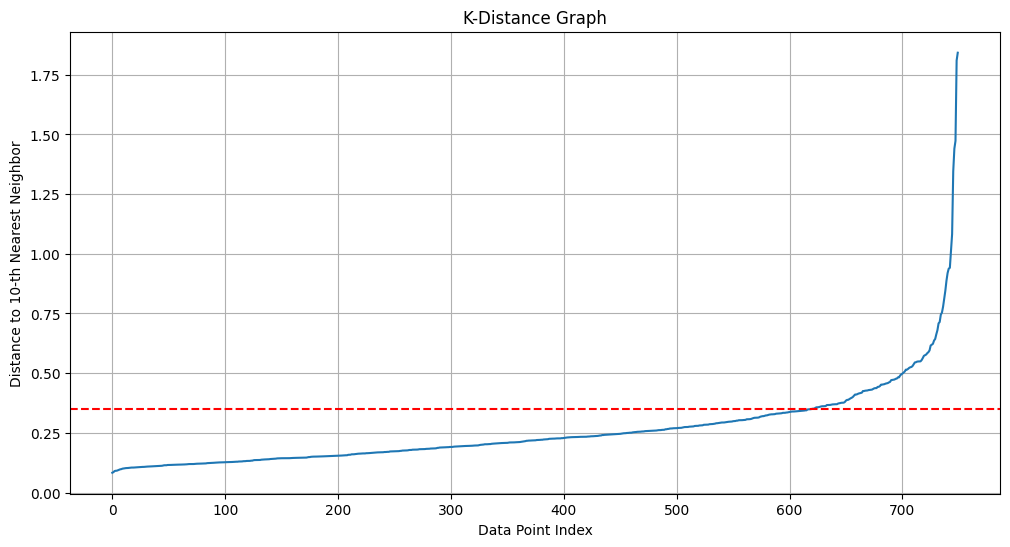

In [44]:
from sklearn.neighbors import NearestNeighbors  # For finding k-nearest neighbors for a given point
# Set the number of neighbors; this value can be optimized based on dataset characteristics
k = 10  # Number of nearest neighbors to consider

# Initialize the NearestNeighbors model from sklearn with 'k' neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=k)

# Fit the model to the reduced features from PCA to prepare for neighbor querying
nearest_neighbors.fit(reduced_features)

# Retrieve the distances and indices of the 'k' nearest neighbors for each point
distances, indices = nearest_neighbors.kneighbors(reduced_features)

# Extract and sort the distance to the k-th nearest neighbor for each point
# This is crucial for determining the proper epsilon value in DBSCAN clustering
sorted_distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph to help identify the best epsilon value for clustering
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Point Index')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.axhline(y=0.35, color='r', linestyle='--')  # Horizontal line for visual aid at epsilon cut-off
plt.grid(True)  # Enable grid for better readability
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.47127304521621166
For n_clusters = 3 The average silhouette_score is : 0.47042869881368565
For n_clusters = 4 The average silhouette_score is : 0.48953614829751346
For n_clusters = 5 The average silhouette_score is : 0.5026718832903943
For n_clusters = 6 The average silhouette_score is : 0.5638907946117595
For n_clusters = 7 The average silhouette_score is : 0.5516465916060775
For n_clusters = 8 The average silhouette_score is : 0.5628854573514069
For n_clusters = 9 The average silhouette_score is : 0.5469795808264738
For n_clusters = 10 The average silhouette_score is : 0.5276461136612417


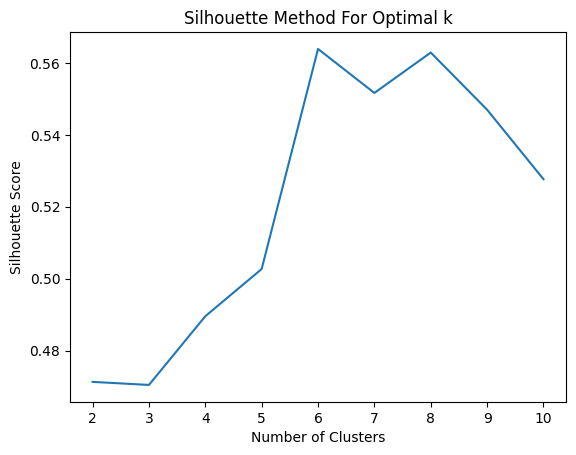

In [45]:
# Import the silhouette_score function for evaluating clustering performance
from sklearn.metrics import silhouette_score

# Assign reduced PCA features to 'X_clu' for clustering
X_clu = reduced_features

# Define a range for the number of clusters to test, from 2 to 10
range_n_clusters = list(range(2, 11))

# Initialize a list to store the average silhouette scores for each number of clusters
silhouette_avg_scores = []

# Loop through the specified range of cluster numbers
for n_clusters in range_n_clusters:
    # Initialize the KMeans clustering model with a specific number of clusters and a fixed random state
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)

    # Apply the clustering algorithm to the dataset and obtain cluster labels
    cluster_labels = clusterer.fit_predict(X_clu)

    # Calculate the average silhouette score for the current number of clusters
    # The silhouette score measures the quality of clustering by how well each point lies within its cluster
    silhouette_avg = silhouette_score(X_clu, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

    # Output the number of clusters and their corresponding silhouette score
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Plot the silhouette scores to visualize the effect of different cluster counts on clustering performance
plt.plot(range_n_clusters, silhouette_avg_scores)
plt.xlabel('Number of Clusters')  # Label the x-axis with the number of clusters
plt.ylabel('Silhouette Score')  # Label the y-axis with the silhouette score values
plt.title('Silhouette Method For Optimal k')  # Title of the plot indicating its purpose
plt.show()  # Display the plot


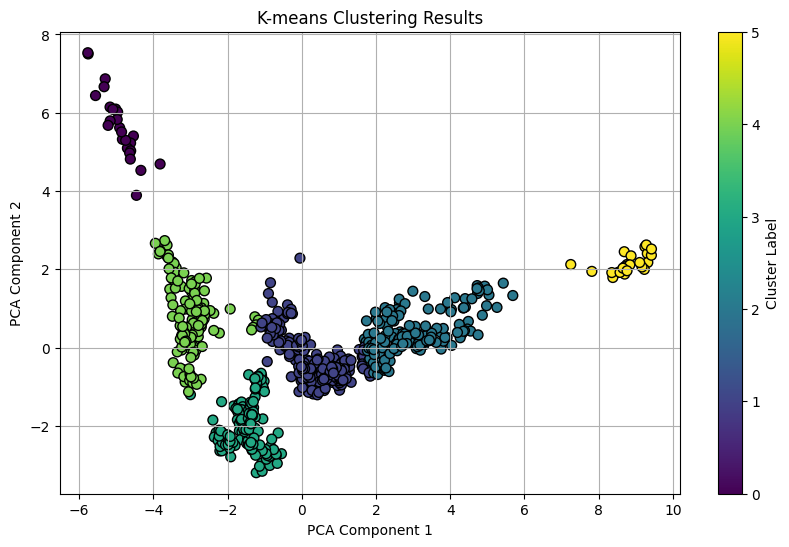

In [46]:
# Import the KMeans class from sklearn for clustering analysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data preparation: reduce dimensions and apply clustering
# Initialize KMeans with 6 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the KMeans model to the reduced feature set and predict cluster assignments
kmeans_clusters = kmeans.fit_predict(reduced_features)

# Visualization of K-means clustering results
# Create a scatter plot of the two principal components from PCA
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)

# Add title and axis labels to the plot
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a color bar to the plot to represent different clusters with unique colors
plt.colorbar(label='Cluster Label')

# Enable grid for better readability of the plot
plt.grid(True)

# Display the plot
plt.show()


Anomalies based cluster

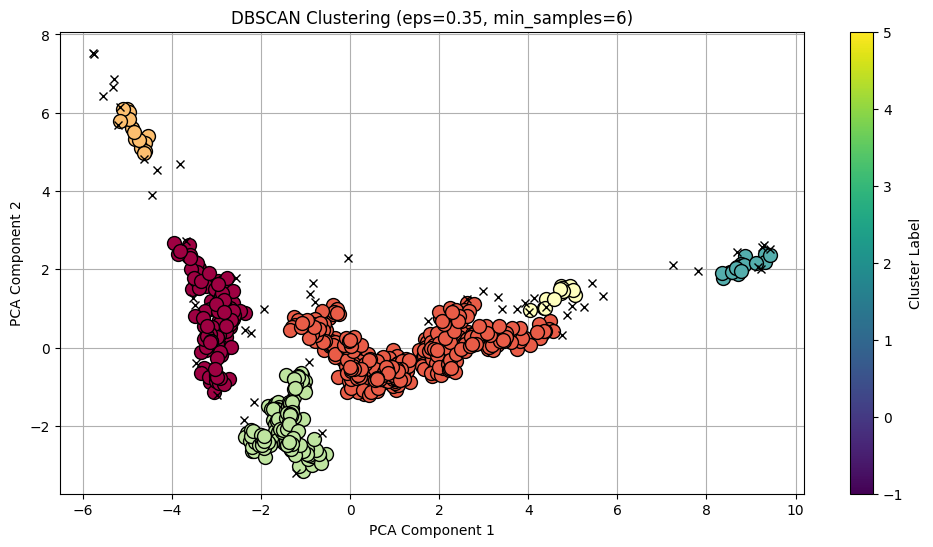

Number of clusters: 6
Number of Anomaly points: 22


In [49]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the epsilon value for DBSCAN, determining the maximum distance between two samples for them to be considered as in the same neighborhood
eps_value = 0.35

# Initialize DBSCAN with specific parameters for neighborhood size and minimum number of samples required to form a cluster
dbscan = DBSCAN(eps=eps_value, min_samples=6)

# Apply DBSCAN to the reduced feature set to identify clusters and noise (outliers)
dbscan_clusters = dbscan.fit_predict(reduced_features)

# Identify core and border points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Calculate the number of clusters, excluding noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Count the noise points identified by DBSCAN
n_noise_ = list(labels).count(-1)

# Prepare to plot the clustering results
plt.figure(figsize=(12, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# Plot each cluster
for k, col in zip(set(labels), colors):
    if k == -1:
        # Noise points are plotted black
        color = 'k'
    else:
        # Convert the color to a tuple for consistent plotting
        color = tuple(col)

    # Select the cluster members
    class_member_mask = (labels == k)

    # Plot core samples
    xy = reduced_features[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=10)

    # Plot border samples
    xy = reduced_features[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=color, markeredgecolor='k', markersize=6)

# Enhance the plot with titles and labels
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples=6)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a colorbar to the plot
norm = Normalize(vmin=min(labels), vmax=max(labels))
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.unique(labels))
cbar.set_label('Cluster Label')

plt.grid(True)
plt.show()

# Print the results of clustering
print(f'Number of clusters: {n_clusters_}')
print(f'Number of Anomaly points: {n_noise_}')
